# Linear Regression

In [1]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

### Data Read

In [2]:
with open('./measurements.csv', 'r') as f:
  csvreader = csv.reader(f, delimiter=',')
  measurements_data = [row for row in csvreader]
  measurements_data = np.array(measurements_data, dtype=np.float32)

### Data Visualization

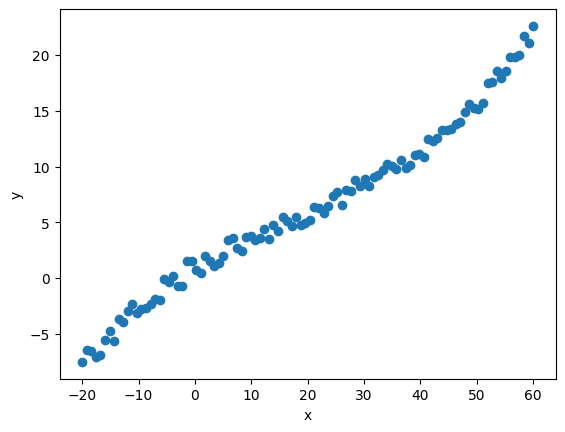

In [3]:
x1, y1 = measurements_data[:, 0], measurements_data[:, 1]
plt.scatter(x1, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Simple Linear Regression

In [4]:
def h_fun(x, theta_0, theta_1):
  '''
  :param x: ndarray of size equal to the number of examples
  :param theta_0: intercept parameter of the single-variable linear regression model
  :param theta_1: coefficient parameter for xi in the single-variable linear regression model
  :return: ndarray of the same size as x, containing regression function values for the given weights
  '''
  return theta_0 + theta_1 * x

In [5]:
def calculate_cost(x, y, theta_0, theta_1):
  '''
  :param x: ndarray of size equal to the number of examples
  :param y: ndarray with reference values of the same size as x
  :param theta_0: intercept parameter of the single-variable linear regression model
  :param theta_1: coefficient parameter for xi in the single-variable linear regression model
  :return: cost function value for the given model parameters
  '''  
  y_pred = h_fun(x, theta_0, theta_1)
  return np.sum(np.square(y_pred - y)) / (2 * y.shape[0])

In [6]:
def linear_regression_1dim(x, y, eps = 1e-5, alpha = 0.001, theta_0 = 0, theta_1 = 0):
  m = y.shape[0]
  cost = calculate_cost(x, y, theta_0, theta_1)
  
  while True:
    y_pred = h_fun(x, theta_0, theta_1)
    dtheta = (y_pred - y) / m 
    dtheta_0 = np.sum(dtheta)
    dtheta_1 = np.sum(dtheta * x)
    theta_0 -= alpha * dtheta_0
    theta_1 -= alpha * dtheta_1
    cost_prev, cost = cost, calculate_cost(x, y, theta_0, theta_1)
    if cost_prev - cost < eps:
      break
    
  return theta_0, theta_1

In [7]:
theta_0, theta_1 = linear_regression_1dim(x1, y1)

In [8]:
print(f"Regression function:\n{theta_1:.4f}x {'+' if theta_0 >= 0 else '-'} {np.abs(theta_0):.4f}")

Regression function:
0.3154x + 0.0065


In [9]:
print(f'Cost: {calculate_cost(x1, y1, theta_0, theta_1):.4f}')

Cost: 0.6392


In [10]:
def plot_data_with_regression(x, y, reg_x, reg_y):
  plt.scatter(x, y, label='Data points')
  plt.plot(reg_x, reg_y, color='red', label='Regression line')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

In [11]:
reg_x1 = np.array([x1[0], x1[-1]])
reg_y1 = h_fun(reg_x1, theta_0, theta_1)

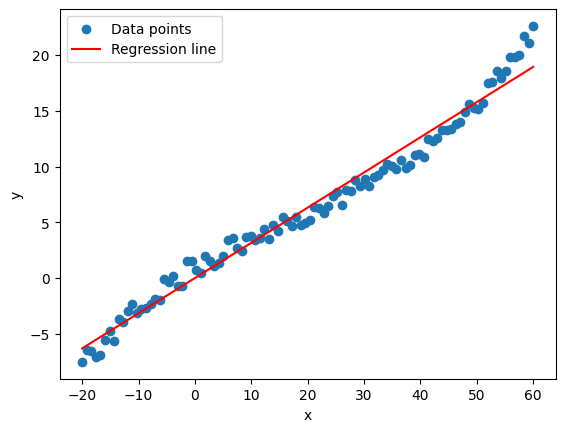

In [12]:
plot_data_with_regression(x1, y1, reg_x1, reg_y1)

## Linear regression for argument of higher dimension

### Measurements data

In [13]:
x2, y2 = measurements_data[:, 0], measurements_data[:, 1]

# adding row of ones on top, vertical concatenate
x2 = np.vstack([np.ones(x2.shape), x2]) 
y2.shape = [1, -1]
print(f'X.shape: {x2.shape}\ny.shape: {y2.shape}')

X.shape: (2, 100)
y.shape: (1, 100)


In [14]:
def h_fun(X, theta):
  '''
  :param X: ndarray of shape (n+1, m).
  :param theta: parameter matrix for optimization of shape (n+1, 1)
  :return: y of shape (1, m)
  '''
  assert theta.shape[1] == 1
  return theta.T @ X  # (1, n+1) @ (n+1, m)

In [15]:
def calculate_cost(X, y, theta):
  '''
  :param X: ndarray of shape (n+1, m).
  :param y: ndarray with reference values of shape (1, m)
  :param theta: parameter matrix for optimization of shape (n+1, 1)
  :return: cost function value
  '''
  y_pred = h_fun(X, theta)
  return np.sum(np.square(y_pred - y)) / (2 * y.shape[1])

In [16]:
def linear_regression_highdim(X, y, eps = 1e-5, alpha = 0.001):
  n, m = X.shape
  # initial values
  theta = np.zeros((n, 1))
  cost = calculate_cost(X, y, theta)
  while True:
    y_pred = h_fun(X, theta)
    assert y_pred.shape == y.shape
    h_y_diff = y_pred - y
    gradient = h_y_diff @ X.T # (1, m) @ (m, n)
    theta = theta - alpha * gradient.T / m
    cost_prev, cost = cost, calculate_cost(X, y, theta)
    # print(f'cost: {cost}, prev: {cost_prev}, ')
    if cost_prev - cost < eps:
      break

  return theta

In [17]:
theta = linear_regression_highdim(x2, y2)
print(theta.shape)

(2, 1)


In [18]:
print(f"Regression function:\n{theta[1, 0]:.4f}x {'+' if theta[0,0] >= 0 else '-'} {np.abs(theta[0, 0]):.4f}")


Regression function:
0.3154x + 0.0065


In [19]:
print(f'Cost: {calculate_cost(x2, y2, theta):.4f}')

Cost: 0.6392


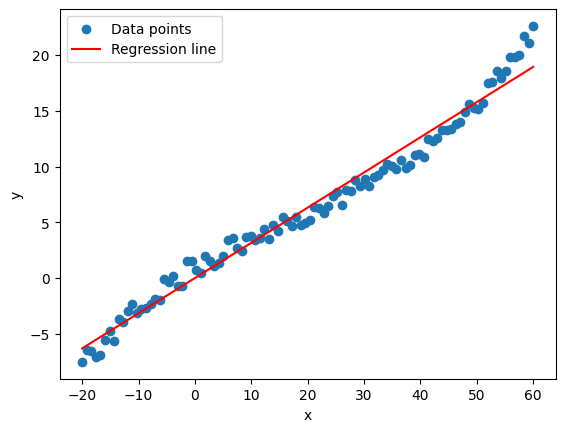

In [20]:
# read of the border values for plotting line
reg_x = np.array([[x2[1, :].min(), x2[1, :].max()]]).flatten()
reg_y = h_fun(np.vstack([np.ones(reg_x.shape), reg_x]), theta).flatten()

plot_data_with_regression(x2[1,:].flatten(), y2.flatten() , reg_x, reg_y)

### Housing data

In [21]:
# data import
with open('./housing.txt', 'r') as f:
  csvreader = csv.reader(f, delimiter=',')
  housing_data = [row for row in csvreader]
  housing_data = np.array(housing_data, dtype=np.float32)
  y3 = housing_data[:, 2]
  y3.shape = [1, y3.shape[0]]
  x3 = housing_data[:, 0:2]
  x3 = np.concatenate([np.ones((x3.shape[0], 1)), x3], axis=1).T

In [22]:
# data normalization
def normalize_data(X, y):
  y_max = y.max()
  y = y / y_max
  y.shape = [1, -1]
  X_max = X.max(axis=1)
  X_max.shape = [-1, 1]
  X = X / X_max
  extremes = {"X_max" : X_max, "y_max" : y_max}
  return X, y, extremes

In [23]:
def scale_data(X, y, extremes):
  X_max = extremes['X_max']
  y_max = extremes['y_max'] 
  return X * X_max, y * y_max

In [24]:
x_norm, y_norm, extremas = normalize_data(x3, y3)
theta = linear_regression_highdim(x_norm, y_norm)
print(theta)

[[0.24937951]
 [0.13701888]
 [0.16736231]]


In [25]:
X_max = extremas['X_max']
y_max = extremas['y_max']

In [26]:
# function which returns proper value despite scalling
regression_function = lambda example: np.squeeze((theta.T @ (example / X_max) * y_max))

In [27]:
example = np.array([[1], [1300], [4]])
h_example = regression_function(example)
print(f'The cost of the property with an area of {example[1][0]} and {example[2][0]} rooms is estimated at {h_example:.2f}')

The cost of the property with an area of 1300 and 4 rooms is estimated at 296090.64


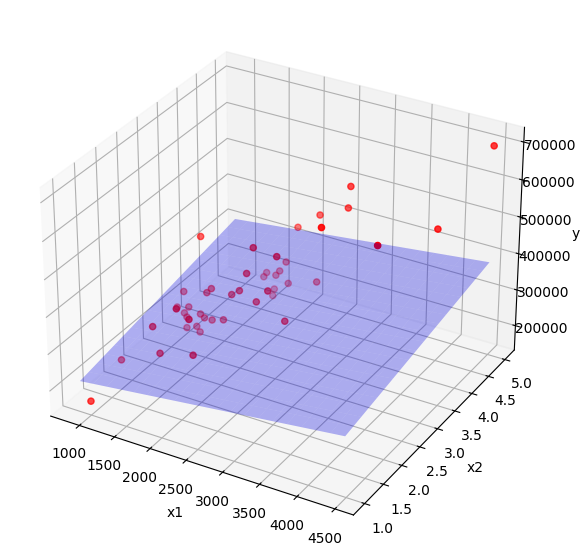

In [28]:
x3_1 = x3[1, :]
x3_2 = x3[2, :]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x1_plane = np.linspace(x3_1.min(), x3_1.max(), 20)
x2_plane = np.linspace(x3_2.min(), x3_2.max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_plane, x2_plane)

X_plane = np.vstack([np.ones(x1_grid.ravel().shape), x1_grid.ravel(), x2_grid.ravel()])
y_plane = regression_function(X_plane).reshape(x1_grid.shape)

ax.scatter(x3_1, x3_2, y3.ravel(), c='red', marker='o', label='Punkty')

ax.plot_surface(x1_grid, x2_grid, y_plane, alpha=0.3, color='blue')


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

# Polynomial regression

In [29]:
x4, y4 = measurements_data[:, 0], measurements_data[:, 1]
y4 = y4.reshape(1,-1)
# adding layers correspoding to the powers of x
x4 = np.vstack([np.ones(x4.shape), x4, x4**2, x4**3])

In [30]:
print(f'X.shape={x4.shape}\ny.shape={y4.shape}')

X.shape=(4, 100)
y.shape=(1, 100)


In [31]:
# data normalization
x4_norm, y4_norm, extremas4 = normalize_data(x4, y4)
X4_max = extremas4['X_max']
print(X4_max)
y4_max = extremas4['y_max']
print(x4_norm.shape)

[[1.00e+00]
 [6.00e+01]
 [3.60e+03]
 [2.16e+05]]
(4, 100)


In [32]:
theta4 = linear_regression_highdim(x4_norm, y4_norm, 1e-10, 1e-3)

In [33]:
print(theta4)

[[ 0.02528658]
 [ 0.77921902]
 [-0.49718083]
 [ 0.65075679]]


In [34]:
regression_function4 = lambda example: np.squeeze(y4_max * (theta4.T @ (example / X4_max)))

(4, 1000)


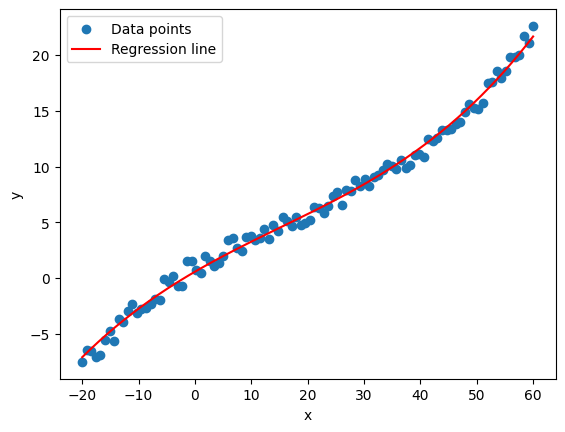

In [35]:
reg_x = np.array(np.linspace(x4[1, :].min(), x4[1, :].max(),1000)) 
x_test = np.vstack([np.ones(reg_x.shape), reg_x, reg_x**2, reg_x**3])
print(x_test.shape)
reg_y = regression_function4(x_test)

plot_data_with_regression(x4[1,:].flatten(), y4.flatten() , reg_x.flatten(), reg_y.flatten())